# Hierarchial Clustering of 2016 Election Data 

In [25]:
#importing external modules 
import numpy as np

#import text file and split on the states names and percentages 
states = [x.split(' ')[0] for x in open('states.txt').readlines()]
X = np.array([x.split()[1:] for x in open('states.txt').readlines()])

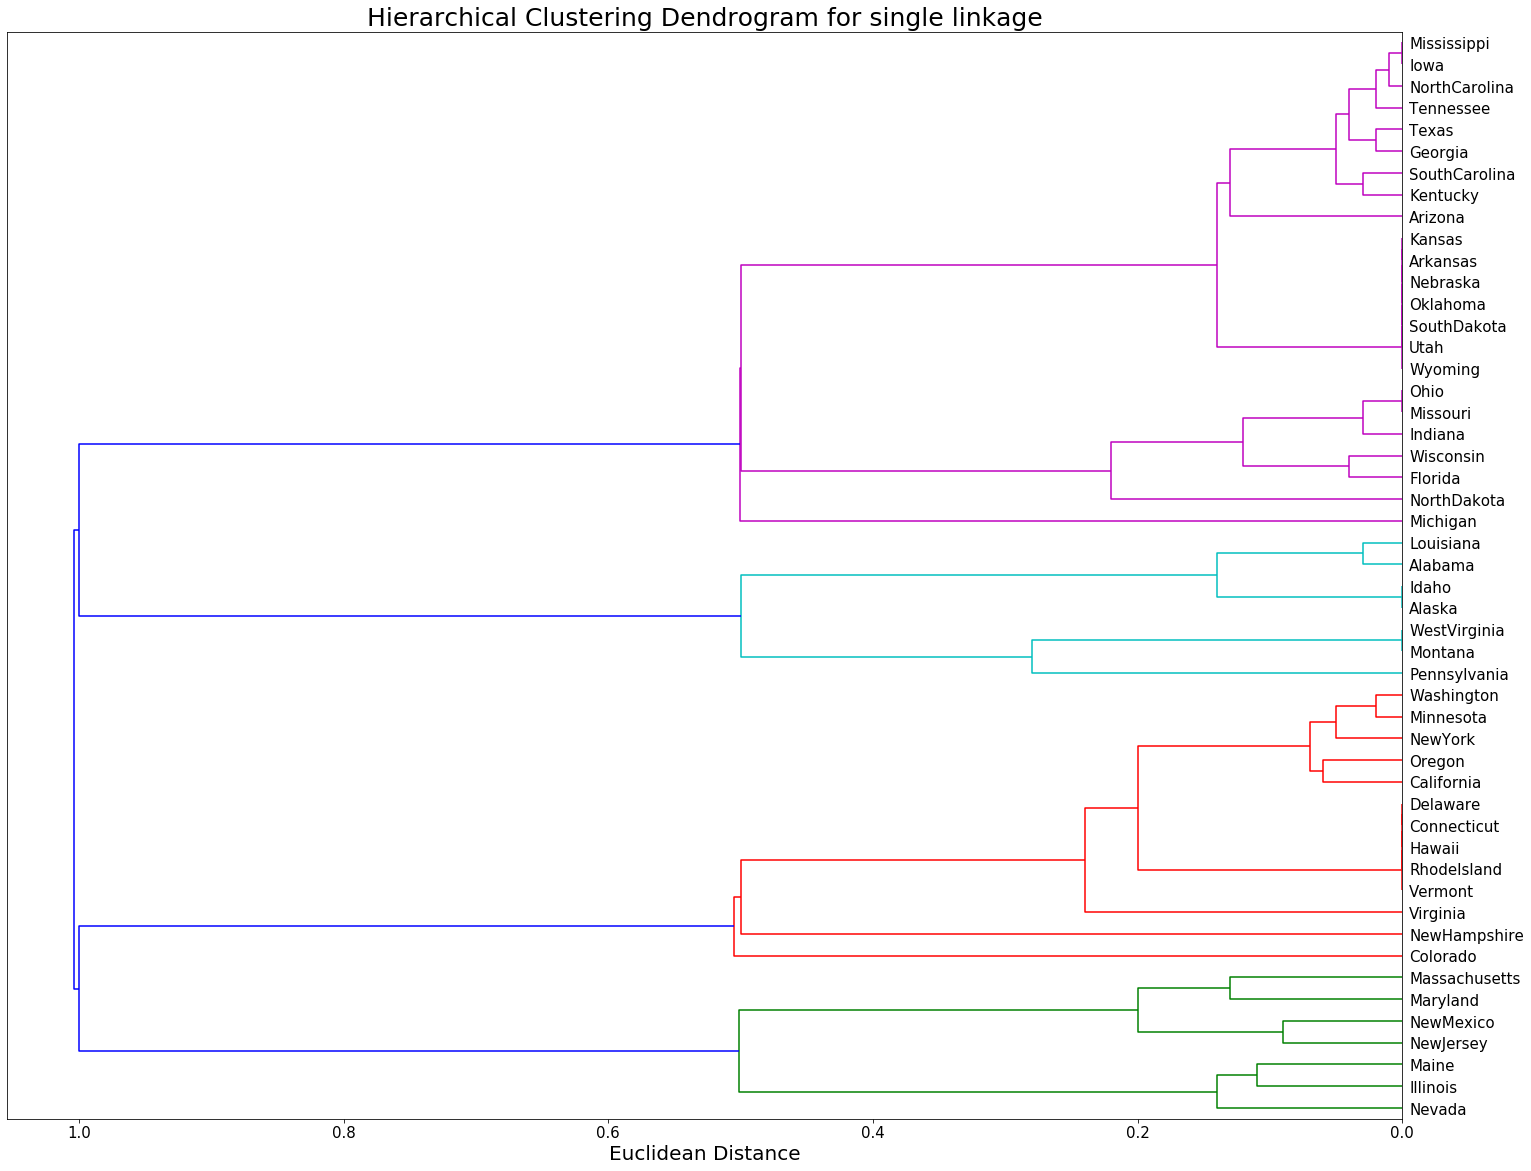

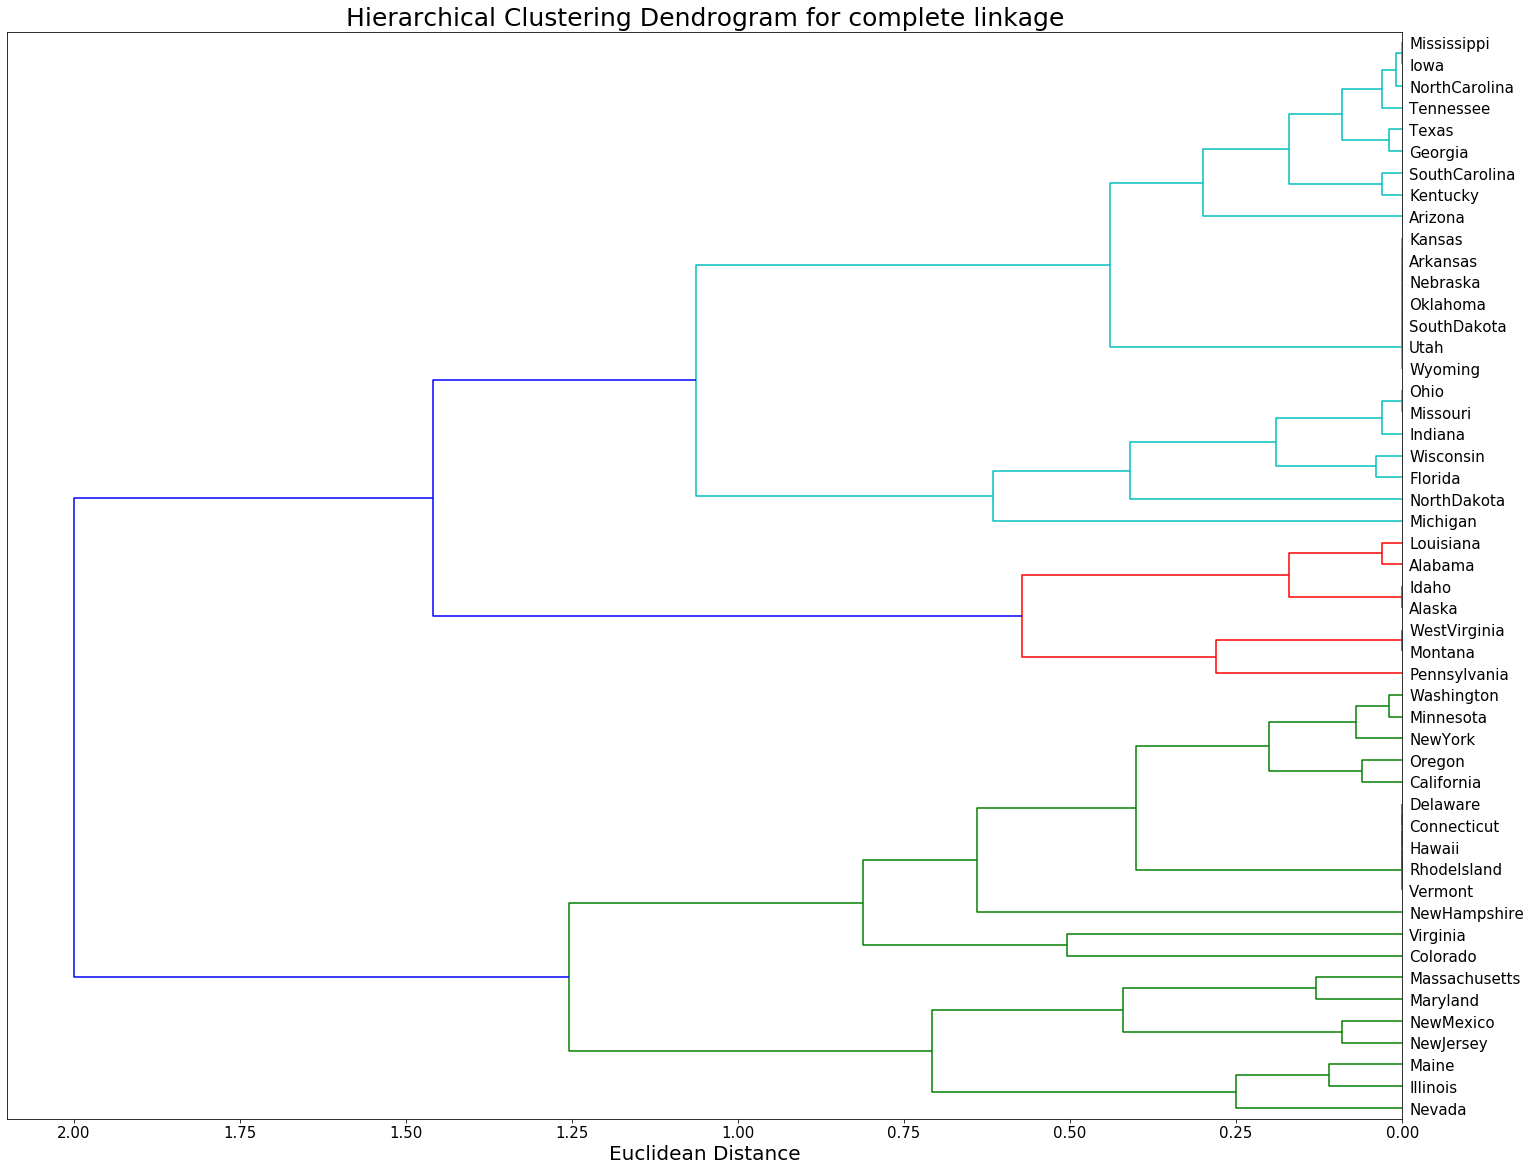

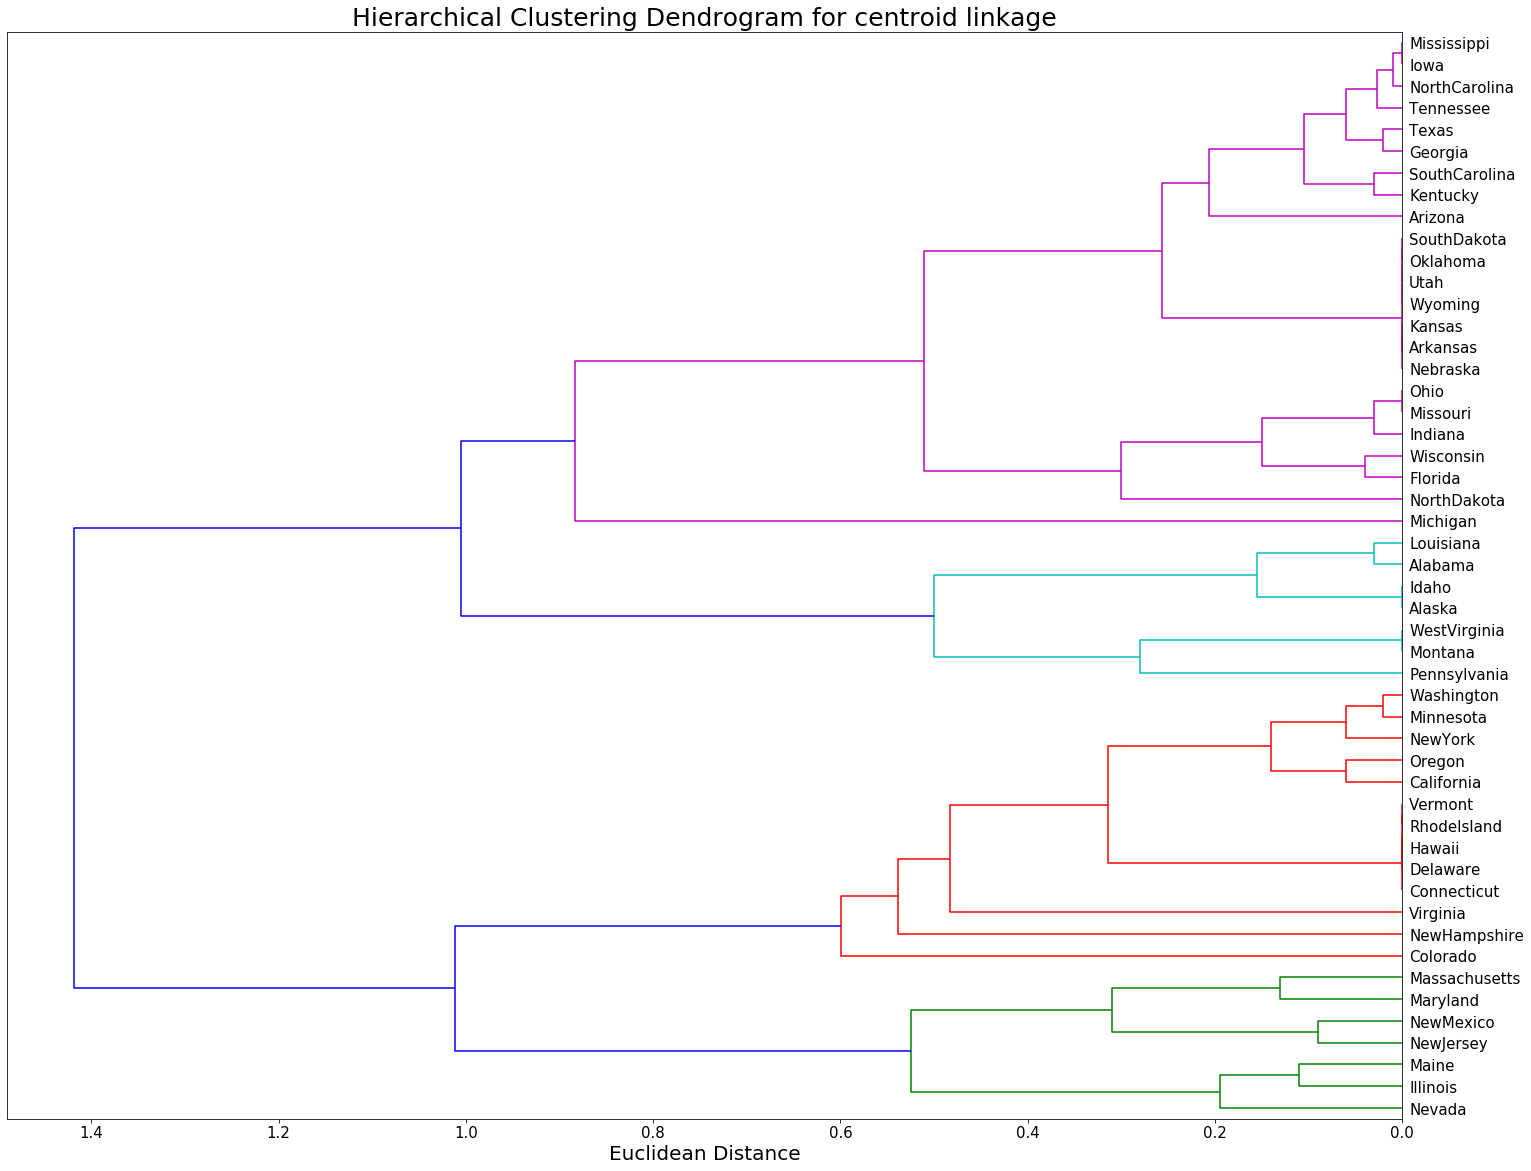

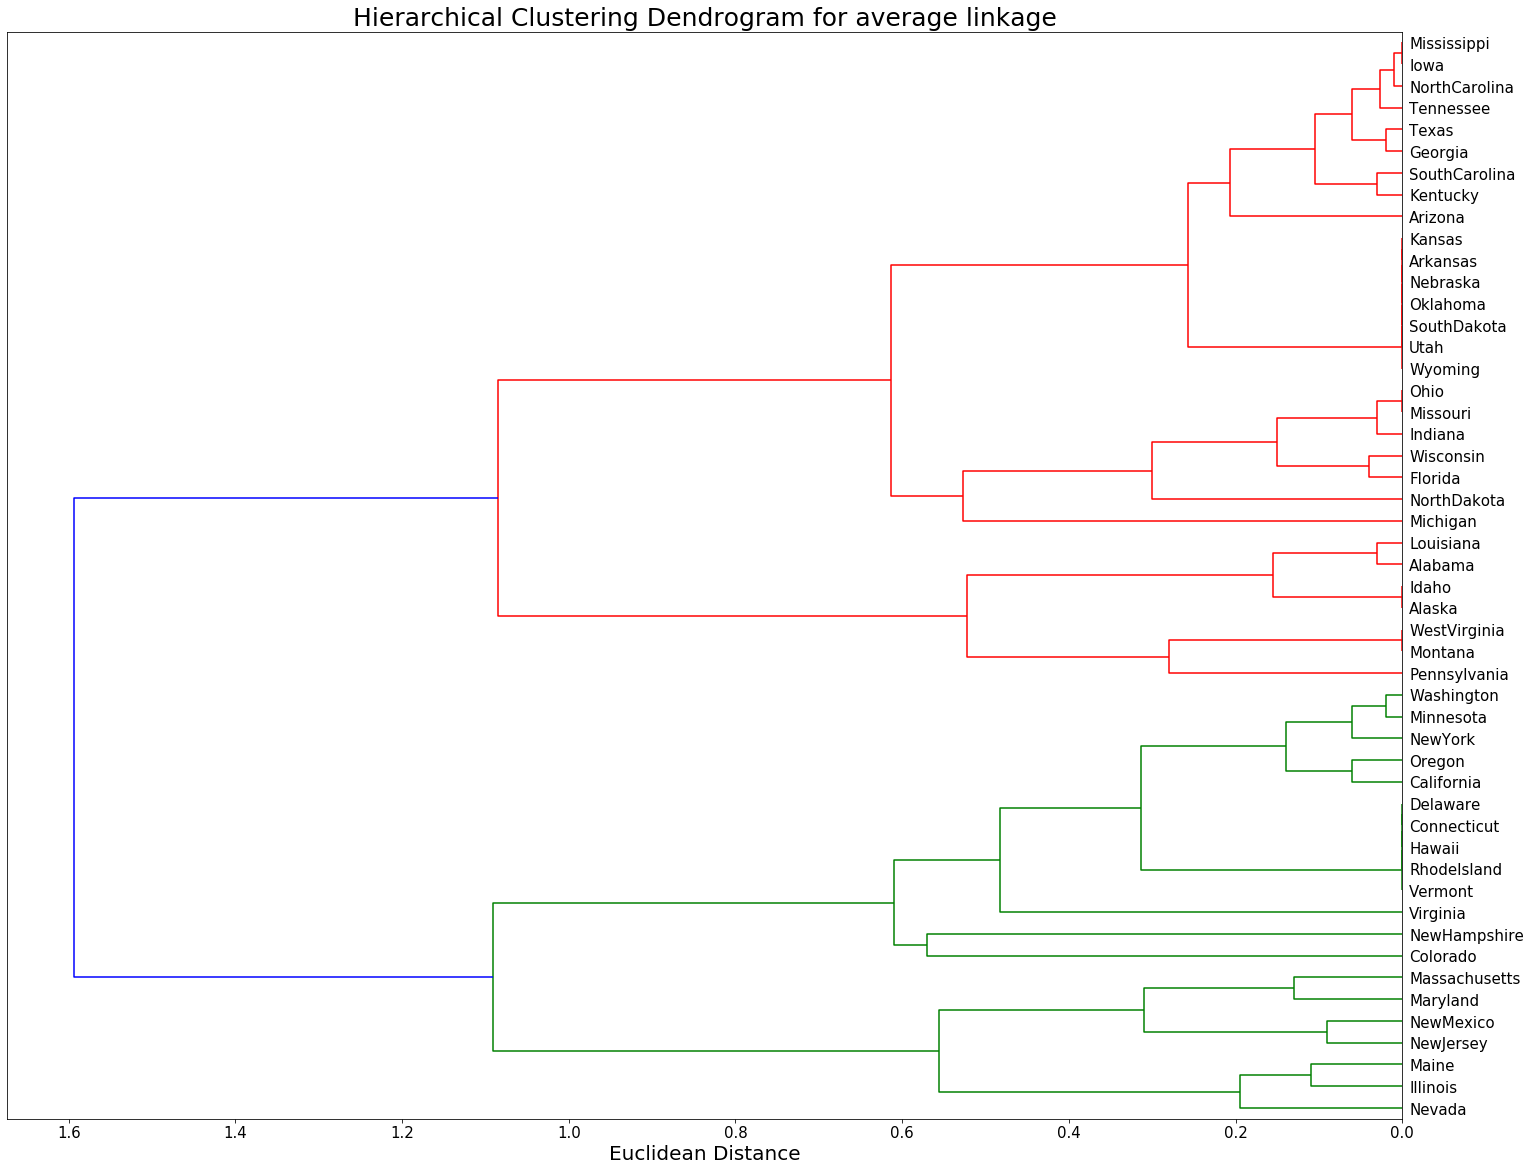

In [79]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

#create list of linked methods 
lst = ['single', 'complete', 'centroid', 'average']

#iterate through each element in linked methods list
for i in lst:
    #create figure canvas 
    plt.figure(figsize=(25,20))
    #include title and xlabel 
    plt.title('Hierarchical Clustering Dendrogram for '+i+' linkage', fontsize=25)
    plt.xlabel('Euclidean Distance', fontsize=20)
    plt.tick_params(axis='x', labelsize=15)
    #plot dendrogram for each linkage method, statenames on the y axis
    #increasing cluster sizes go from right to left 
    dend = shc.dendrogram(shc.linkage(X, method=i, metric='euclidean'),
                          orientation='left',
                          count_sort='descendent',
                          leaf_rotation=360,
                          leaf_font_size=15,
                          labels=states)

## Conclusions